In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

In [40]:
speed = [3, 5, 15, 99,86,87,88,111,86,103,87,94,78,77,85,86]

In [41]:
#MEAN
print(np.mean(speed))

74.375


In [42]:
#MEDIAN
print(np.median(speed))

86.0


In [43]:
#MODE
#mode() returns a ModeResult object that contains the MODE number () and COUNT (how many times it appeared)
print(stats.mode(speed))
print(stats.mode(speed).mode)
print(stats.mode(speed).count)

ModeResult(mode=array([86]), count=array([3]))
[86]
[3]


In [44]:
#STANDARD DEVIATION
print(np.std(speed))

33.192384292183654


In [45]:
#VARIANCE
print(np.var(speed))

1101.734375


In [46]:
#PERCENTILE
print(np.percentile(speed, 75))

89.5


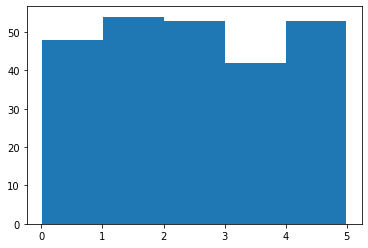

In [47]:
#HISTOGRAM
x = np.random.uniform(0.0, 5.0, 250)
plt.hist(x, 5)
plt.show()

[3.85488987 0.44525098 4.56747745 ... 2.37618155 2.23083884 4.81202018]


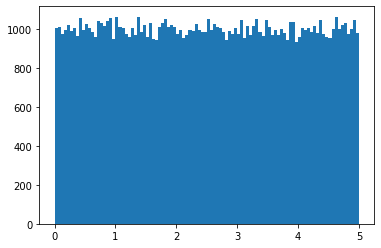

In [48]:
#DATA DISTRIBUTION

#np.random.uniform(lowest possible value, highest possible value, number of values)
x = np.random.uniform(0.0, 5.0, 100000)
print(x)

#Draw a histogram with 100 bars
plt.hist(x, 100)
plt.show()

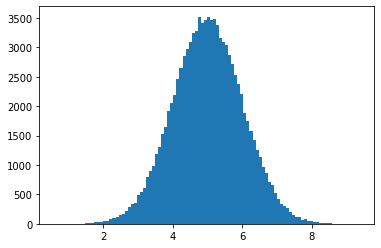

In [49]:
#NORMAL DATA DISTRIBUTION

#np.random.normal(mean value, standard deviation, number of values)
x = np.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

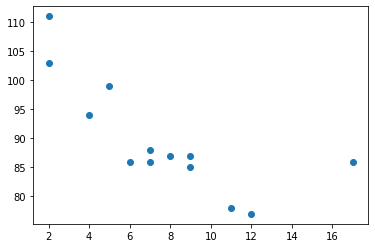

In [50]:
#SCATTER PLOT

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

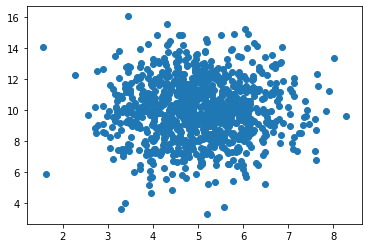

In [51]:
#RANDOM DATA DISTRIBUTIONS

#np.random.normal(mean value, standard deviation, number of values)
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

-0.758591524376155
85.59308314937454
-70.27152317880791


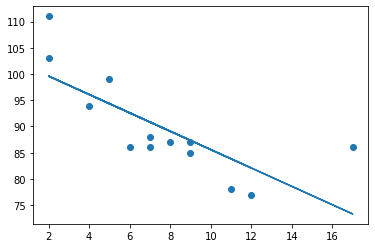

In [52]:
#LINEAR REGRESSION
#The term used when try to find the relatioship between variables

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

def myfunc(x):
  return slope * x + intercept

print(myfunc(10))
print(myfunc(99))

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

0.01331814154297491


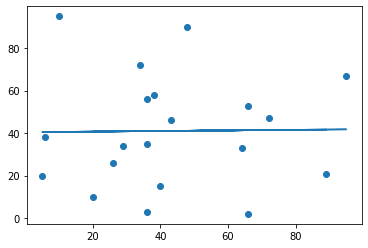

In [53]:
#LINEAR REGRESSION
#Example where very bad fit

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

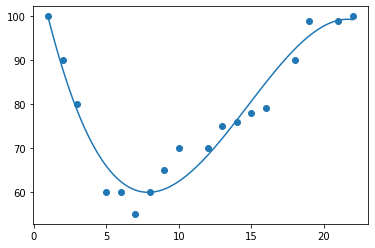

In [54]:
#POLYNOMIAL REGRESSION
#Ideal for when data points will clearly not fit a linear regression

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

#Polynomial method
mymodel = np.poly1d(np.polyfit(x, y, 3))

#Start at position 1, end at position 2
myline = np.linspace(1, 22, 100)

#Draw the original scatter plot
plt.scatter(x, y)

#Draw the line of polynomial regression
plt.plot(myline, mymodel(myline))

#Display the diagram
plt.show()

In [55]:
#R-SQUARED
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

#Predict car speed at 17:00 hours
print(mymodel(17))

0.9432150416451027
88.87331269697987


0.009952707566680652


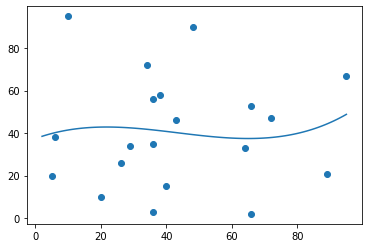

In [56]:
#R-SQUARED
#Example where bad fit

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(2, 95, 100)

print(r2_score(y, mymodel(x)))

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [57]:
#MULTIPLE REGRESSION
#Similar to Linear Regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

df = pd.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#Print the coefficient values of the regression object
print(regr.coef_)

#Predict the CO2 emissions of a car where the weight is 2300kg, and the volume is 1300ccm
predictedCO2 = regr.predict([[3300, 1300]])
print(predictedCO2)

[0.00755095 0.00780526]
[114.75968007]


In [58]:
#Scale

#Standardization
# z = ( x - u ) / s
# z is the new value
# x is the original value
# u is the mean
# s is the standard deviation

#Car Weight Example 790
#(790 - 1292.23) / 238.74 = -2.1

#Car Volume Example 1.0
#(1.0 - 1.61) / 0.38 = -1.59

#Now compare -2.1 and -1.59
#Sklearn has a method called StandardScaler() which returns a Scaler object with methods for transforming data sets

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pd.read_csv("cars.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


In [59]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pd.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[97.07204485]


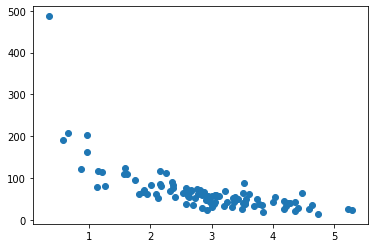

In [60]:
# Train/Test

import matplotlib.pyplot as plt
np.random.seed(2)

#np.random.normal(mean value, standard deviation, number of values)
x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

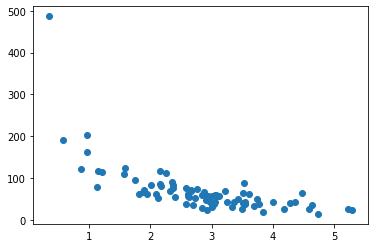

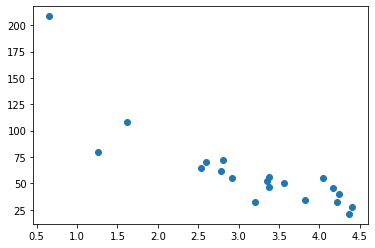

In [61]:
#80% Training
train_x = x[:80]
train_y = y[:80]

#20%
test_x = x[80:]
test_y = y[80:]

#Plot Training Data
plt.scatter(train_x, train_y)
plt.show()

#Plot Test Data
plt.scatter(test_x, test_y)
plt.show()

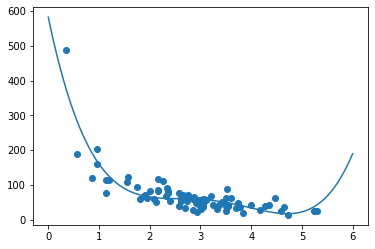

0.7988645544629795
0.8086921460343677


In [62]:
mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

r2_train = r2_score(train_y, mymodel(train_x))
r2_test = r2_score(test_y, mymodel(test_x))
print(r2_train)
print(r2_test)

In [65]:
#Predicting values with this model

print(mymodel(1))
print(mymodel(2.5))
print(mymodel(5))
print(mymodel(7))


160.1881066784606
60.82455395856675
22.87962591812061
835.3029790980423
